In [1]:
import os
import sys
from contextlib import contextmanager
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from bandit_algorithms import LinUCB, SlidingWindowLinUCB, LinUCBDecay, LinTS, EpsilonGreedy, SlidingDoublyRobustSoftmax, RidgeSoftmax
from bandit_experiment import BanditExperiment

In [3]:
# Set plotting style
plt.style.use('seaborn-v0_8-paper')  # For document-ready figures

# Additional seaborn customizations
sns.set_context("paper")  # Options: paper, notebook, talk, poster
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size
plt.rcParams['savefig.dpi'] = 300  # High resolution for saved figures

In [ ]:
# Load the dataset
def load_data(file_path='fx_trading_dataset.json'):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

data = load_data()
print(f"Dataset contains {len(data)} trade instances")
print(f"First data entry: {data[0]}")

Dataset contains 18250 trade instances
First data entry: {'context': {'currency_pair': 'GBP/USD', 'volatility': 0.096, 'size': 390, 'time_of_day': 'pre-close', 'date': '2023-01-01'}, 'rewards': {'0': 0.53657, '1': 0.177, '2': 0.35056, '3': 0.13953}}


In [ ]:
@contextmanager
def silence_stdout():
    old_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')
    try:
        yield
    finally:
        sys.stdout.close()
        sys.stdout = old_stdout

# Number of Monte Carlo runs
n_runs = 100  # Adjust as needed
results_list = []

# Initialize a dictionary to store per-algorithm reward matrices
reward_trajectories = {}

for run_idx in range(n_runs):
    experiment = BanditExperiment(data)
    print(f"\nMonte Carlo Run: {run_idx}")

    experiment.add_algorithm(LinUCB, alpha=0.507)
    experiment.add_algorithm(SlidingWindowLinUCB, alpha=0.459, window_size=1000)
    experiment.add_algorithm(LinUCBDecay, alpha=0.487, decay=0.99985)
    experiment.add_algorithm(LinTS, v=0.0257)
    experiment.add_algorithm(EpsilonGreedy, epsilon=0.0247)
    experiment.add_algorithm(RidgeSoftmax, tau=0.0345)
    experiment.add_algorithm(SlidingDoublyRobustSoftmax, tau=0.0538, window_size=1000)

    with silence_stdout():
        run_results = experiment.run()

    for algo_name, result_dict in run_results.items():
        final_reward = result_dict['cumulative_rewards'][-1]
        final_regret = result_dict['cumulative_regrets'][-1]

        # Store final metrics
        results_list.append({
            'run': run_idx,
            'algorithm': algo_name,
            'final_cumulative_reward': final_reward,
            'final_cumulative_regret': final_regret
        })

        # Initialize matrix if not already
        if algo_name not in reward_trajectories:
            reward_trajectories[algo_name] = []

        # Store full trajectory
        reward_trajectories[algo_name].append(result_dict['cumulative_rewards'])

# Convert lists to numpy arrays
for algo_name in reward_trajectories:
    reward_matrix = reward_trajectories[algo_name]
    reward_trajectories[algo_name] = np.stack(reward_matrix, axis=0)

monte_carlo_results = pd.DataFrame(results_list)
print("Monte Carlo simulation completed.")

Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]


Monte Carlo Run: 0
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 1
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 2
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]


Monte Carlo Run: 3
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 4
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]


Monte Carlo Run: 5
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 6
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 7
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 8
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 9
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 10
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 11
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]



Monte Carlo Run: 12
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]


Monte Carlo Run: 13
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms:   0%|          | 0/7 [00:00<?, ?it/s]


Monte Carlo Run: 14
Initializing LinUCB with alpha=0.507
Initializing SW-LinUCB with alpha=0.459, window_size=1000
Initializing LinUCB with alpha=0.459
Initializing LinUCBDecay with alpha=0.487, decay=0.99985
Initializing LinTS with v=0.0257
Initializing EpsilonGreedy with epsilon=0.0247
Initializing Plain Softmax with tau=0.0345
Initializing DR-Softmax with tau=0.0538, window_size=1000


Running algorithms: 100%|██████████| 7/7 [05:06<00:00, 43.75s/it]


Monte Carlo simulation completed.


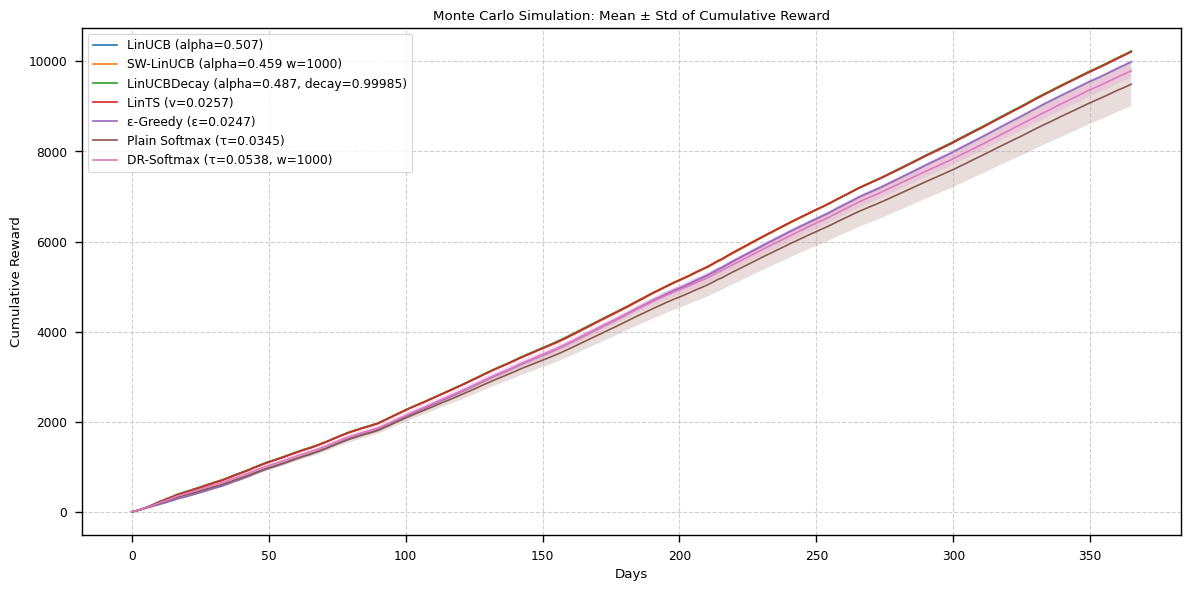

In [6]:
# Plot mean ± std of cumulative rewards across runs
experiment.plot_mean_std_multiple(reward_trajectories, trades_per_day=50)

In [ ]:

grouped_stats = monte_carlo_results.groupby('algorithm').agg({
    'final_cumulative_reward': ['mean', 'std'],
    'final_cumulative_regret': ['mean', 'std']
})

print("Grouped statistics across runs:")
print(grouped_stats)

Grouped statistics across runs:
                                         final_cumulative_reward              \
                                                            mean         std   
algorithm                                                                      
DR-Softmax (τ=0.0538, w=1000)                        9787.849251  151.838129   
LinTS (v=0.0257)                                    10205.803067   10.905389   
LinUCB (alpha=0.507)                                10219.659440    0.000000   
LinUCBDecay (alpha=0.487, decay=0.99985)            10221.941440    0.000000   
Plain Softmax (τ=0.0345)                             9489.171491  502.951724   
SW-LinUCB (alpha=0.459 w=1000)                      10222.251270    0.000000   
ε-Greedy (ε=0.0247)                                  9987.382865   45.494940   

                                         final_cumulative_regret              
                                                            mean         std  
algorithm

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# ----- ANOVA on Final Cumulative Reward -----
# Fit an OLS model with algorithm as a factor.
model = ols('final_cumulative_reward ~ C(algorithm)', data=monte_carlo_results).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results for Final Cumulative Reward:")
print(anova_table)
# Save ANOVA table to CSV
anova_table.to_csv("anova_results.csv", sep=';', index=False)

# ----- Tukey's HSD Post-Hoc Test -----
tukey_result = pairwise_tukeyhsd(endog=monte_carlo_results['final_cumulative_reward'],
                                 groups=monte_carlo_results['algorithm'],
                                 alpha=0.05)
print("\nTukey HSD Results for Final Cumulative Reward:")
print(tukey_result.summary())

# Convert Tukey summary table to a pandas DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:],  # skip header row
                        columns=tukey_result._results_table.data[0])  # header row

# Save to CSV
tukey_df.to_csv("tukey_hsd_results.csv", sep=';', index=False)

ANOVA Results for Final Cumulative Reward:
                    sum_sq    df          F        PR(>F)
C(algorithm)  7.392065e+06   6.0  30.999109  1.273271e-20
Residual      3.894856e+06  98.0        NaN           NaN

Tukey HSD Results for Final Cumulative Reward:
                                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                                     
                 group1                                   group2                   meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------------------------------------------
           DR-Softmax (τ=0.0538, w=1000)                         LinTS (v=0.0257)  417.9538    0.0  198.8066   637.101   True
           DR-Softmax (τ=0.0538, w=1000)                     LinUCB (alpha=0.507)  431.8102    0.0   212.663  650.9574   True
           DR-Softmax (τ=0.0538, w=1000) LinUCBDecay (alpha=0.487, decay=0.99985)  434.0922    0.0   214.

In [10]:
# Save Tukey summary to DataFrame
tukey_df = pd.DataFrame(
    data=tukey_result._results_table.data[1:],  # skip header
    columns=tukey_result._results_table.data[0]
)



In [11]:
tukey_df.to_csv("tukey_final_cum_reward.csv", index=False)
anova_table.to_csv("anova_final_cum_reward.csv")

In [ ]:
tukey_df['Interpretation'] = tukey_df.apply(
    lambda row: f"{row['group1']} is {'significantly' if row['reject'] else 'not significantly'} different from {row['group2']}",
    axis=1
)

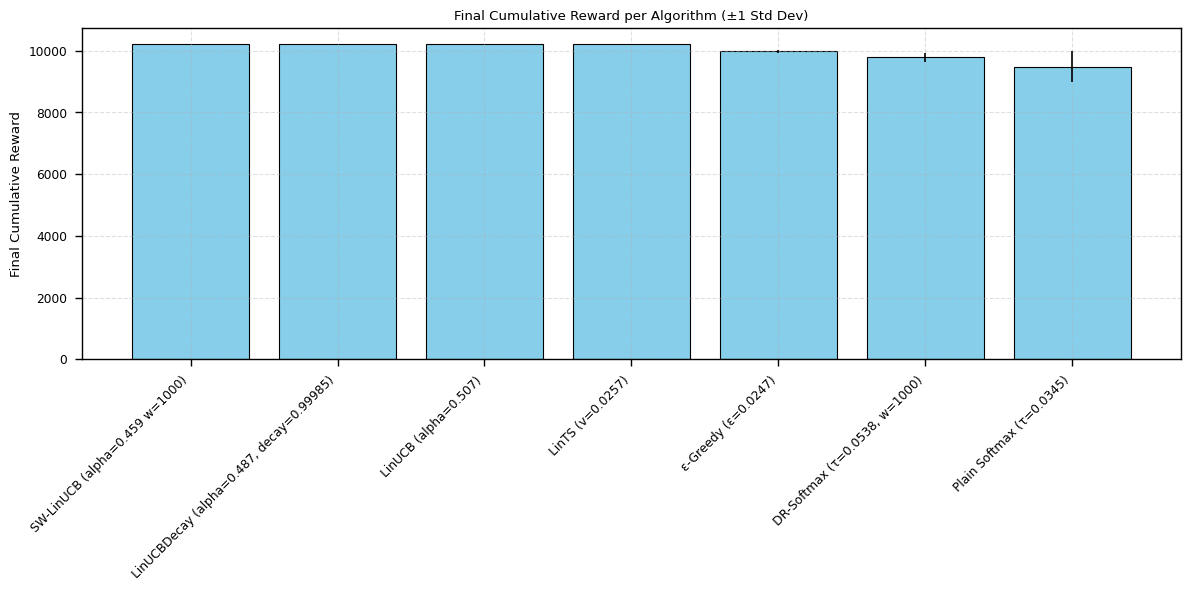

In [14]:
# Flatten MultiIndex columns if necessary
grouped_stats.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in grouped_stats.columns]

# Reset index to bring 'algorithm' back as a column if it's in the index
if grouped_stats.index.name == 'algorithm' or 'algorithm' not in grouped_stats.columns:
    grouped_stats = grouped_stats.reset_index()

# Sort by descending mean reward
sorted_stats = grouped_stats.sort_values(by='final_cumulative_reward_mean', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(
    sorted_stats['algorithm'],
    sorted_stats['final_cumulative_reward_mean'],
    yerr=sorted_stats['final_cumulative_reward_std'],
    capsize=5,
    color='skyblue',
    edgecolor='black'
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Final Cumulative Reward")
plt.title("Final Cumulative Reward per Algorithm (±1 Std Dev)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

/var/folders/13/kkvvmk4s21g00sbcvznx0vtm0000gn/T/ipykernel_78795/1771864497.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reward_df, x='Algorithm', y='Reward', palette="Set3")


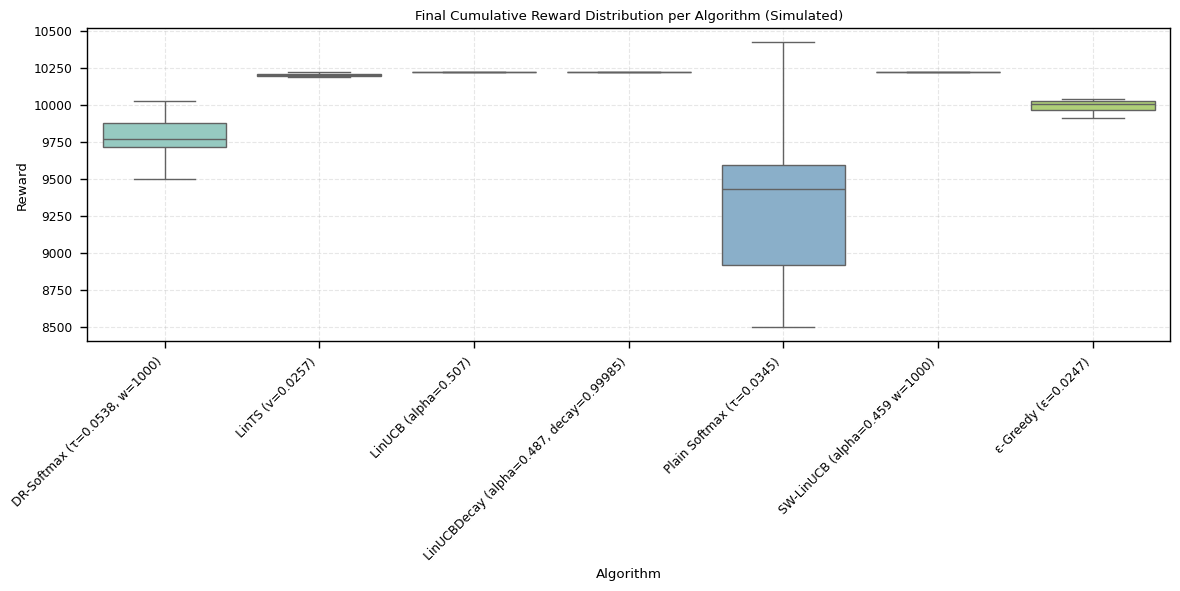

In [16]:


# Create synthetic reward samples (15 values per algorithm)
np.random.seed(42)
reward_samples = []

for _, row in grouped_stats.iterrows():
    rewards = (
        [row['final_cumulative_reward_mean']] * 15
        if row['final_cumulative_reward_std'] == 0
        else np.random.normal(row['final_cumulative_reward_mean'], row['final_cumulative_reward_std'], 15)
    )
    for reward in rewards:
        reward_samples.append({
            'Algorithm': row['algorithm'],
            'Reward': reward
        })

reward_df = pd.DataFrame(reward_samples)

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=reward_df, x='Algorithm', y='Reward', palette="Set3")
plt.xticks(rotation=45, ha='right')
plt.title("Final Cumulative Reward Distribution per Algorithm (Simulated)")
plt.ylabel("Reward")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/13/kkvvmk4s21g00sbcvznx0vtm0000gn/T/ipykernel_78795/222574999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


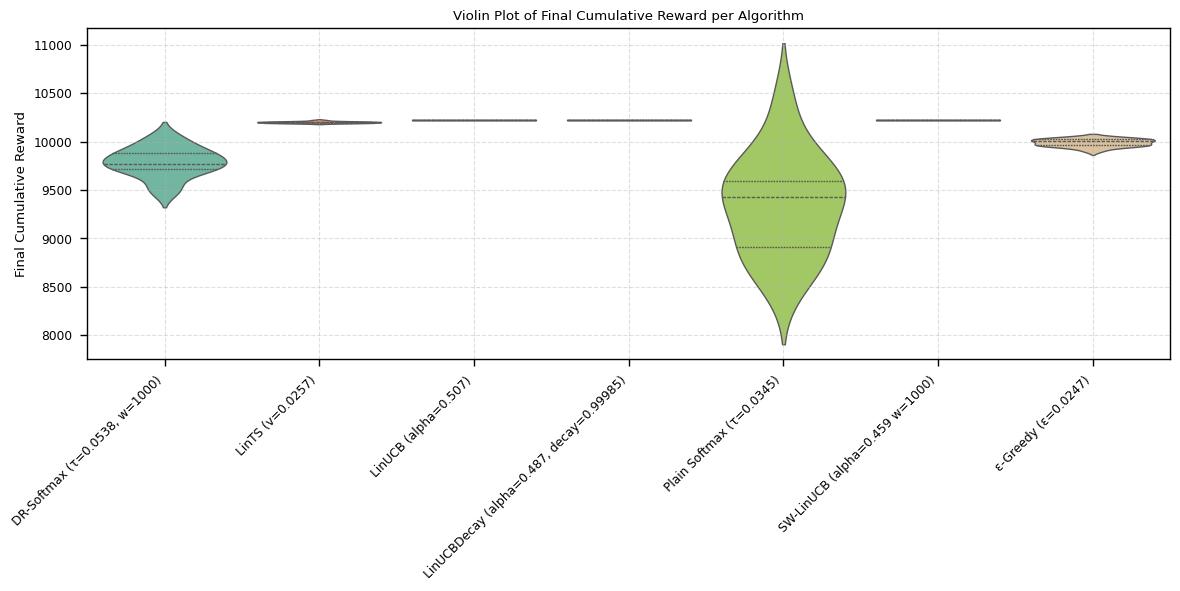

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=reward_df,
    x='Algorithm',
    y='Reward',
    inner='quartile',  # shows median and IQR
    palette='Set2'
)

plt.title("Violin Plot of Final Cumulative Reward per Algorithm")
plt.ylabel("Final Cumulative Reward")
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()